I found the code for the perlin noise online, unfortunately its differential is not available, and I need it to calculate normals. The numerical differential formula starts glitching for large range. Now I am not emotinally stable enough to sit through having to calculate it by hand, so Imma just make a computation graph and use that instead.

In [1]:
import jax
from jax import numpy as jnp
from jax import grad

In [2]:
    def fade(t): 
        return t*t*t*(t*(t*6.0-15.0)+10.0)
    def permute(x):
        return jnp.mod(((x*34.0)+1.0)*x, 289.0)
    def dot(x,y):
        return jnp.sum(x * y)

    def cnoise(x,y):
        Pf, Pi = jnp.modf(jnp.array([x,y,x,y]))
        Pi += jnp.array([0.0, 0.0, 1.0, 1.0]) 
        Pf -= jnp.array([0.0, 0.0, 1.0, 1.0]) 
        Pi = jnp.mod(Pi , 289.0)  
        ix = jnp.array([Pi[0],Pi[2],Pi[0],Pi[2]]) 
        iy = jnp.array([Pi[1], Pi[1], Pi[3], Pi[3]]) 
        fx = jnp.array([Pf[0], Pf[2], Pf[0], Pf[2]]) 
        fy = jnp.array([Pf[1], Pf[1], Pf[3], Pf[3]]) 
        i = permute(permute(ix) + iy) 
        gx = 2.0 * jnp.modf(i * 0.0243902439)[0] - 1.0
        gy = abs(gx) - 0.5
        tx = jnp.floor(gx + 0.5) 
        gx = gx - tx 
        g00 = jnp.array([gx[0],gy[0]]) 
        g10 = jnp.array([gx[1],gy[1]]) 
        g01 = jnp.array([gx[2],gy[2]]) 
        g11 = jnp.array([gx[3],gy[3]]) 
        norm = 1.79284291400159 - 0.85373472095314 * jnp.array([dot(g00, g00), dot(g01, g01), dot(g10, g10), dot(g11, g11)]) 
        g00 *= norm[0] 
        g01 *= norm[1] 
        g10 *= norm[2] 
        g11 *= norm[3] 
        n00 = dot(g00, jnp.array([fx[0], fy[0]])) 
        n10 = dot(g10, jnp.array([fx[1], fy[1]])) 
        n01 = dot(g01, jnp.array([fx[2], fy[2]])) 
        n11 = dot(g11, jnp.array([fx[3], fy[3]])) 
        fade_xy = fade(jnp.array([Pf[0], Pf[1]])) 
        n_x = jnp.array([n00, n01]) * (1 - fade_xy[0]) +  jnp.array([n10, n11]) * fade_xy[0] 
        n_xy = n_x[0] * (1 - fade_xy[1]) + n_x[1] * fade_xy[1] 
        return 2.3 * n_xy 


In [3]:
z = jax.xla_computation(cnoise)(0.12,0.34)

In [4]:
with open("Perlin Noise.dot", "w") as f:
    f.write(z.as_hlo_dot_graph())

In [5]:
!dot Perlin\ Noise.dot  -Tpng > Perlin\ Noise.png

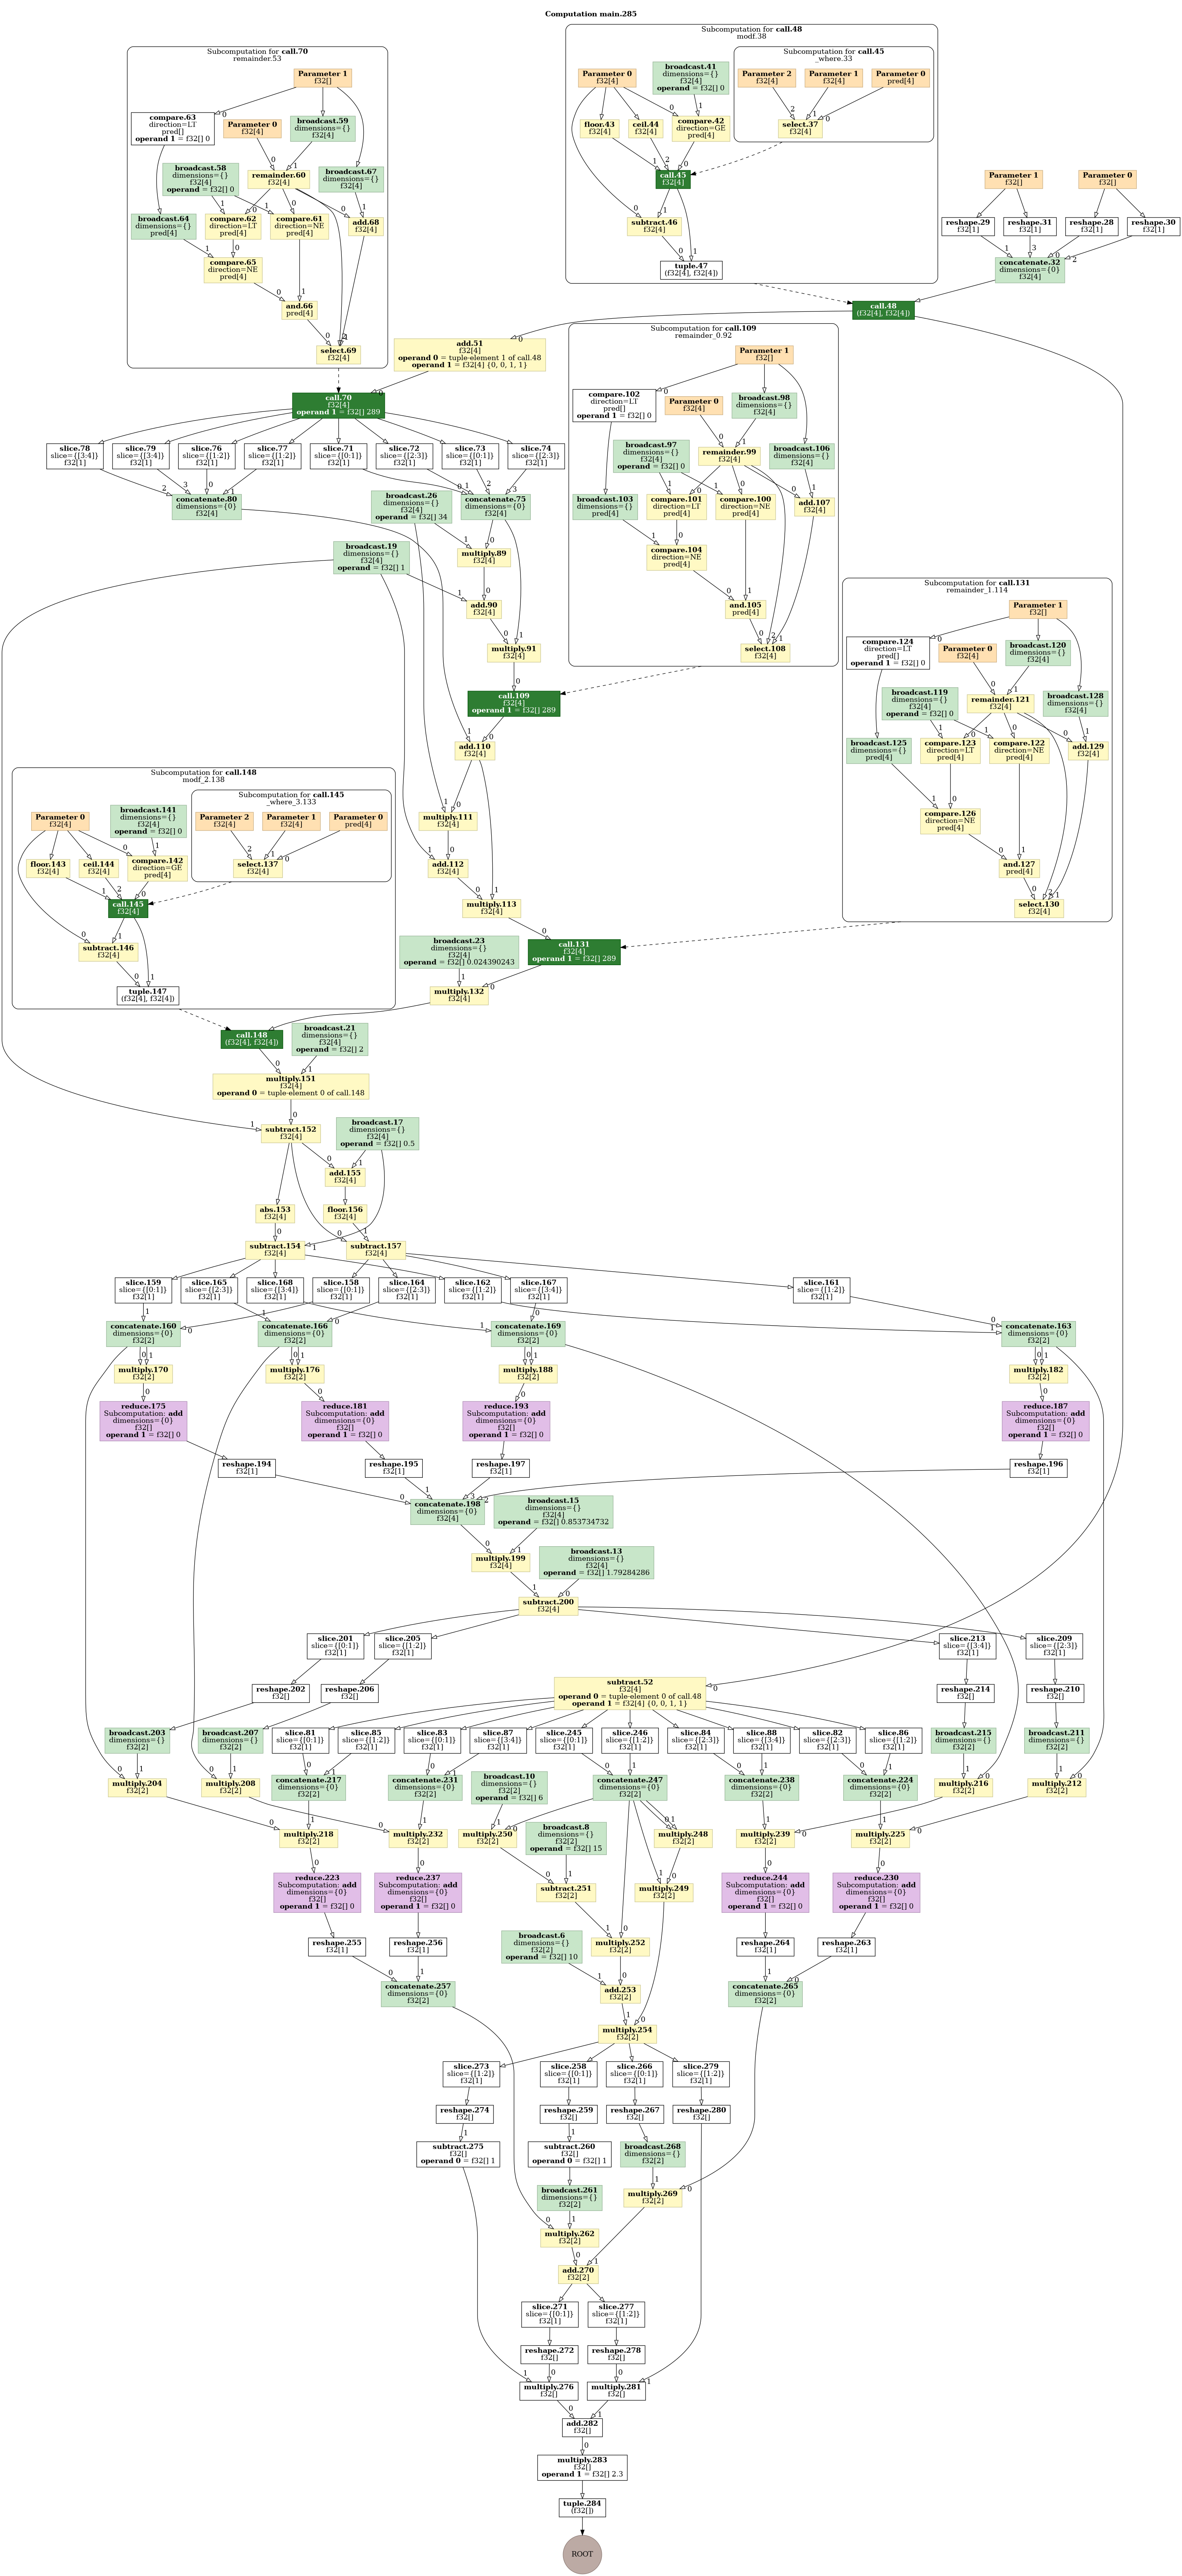

In [8]:
from IPython.display import Image
Image(filename='Perlin Noise.png') 

# offffffffff
Truned out to be a lot more complicated than I was expecting

In [11]:
with open("Perlin Noise Gradient.dot", "w") as f:
    f.write(grad_perlin_xla_obj.as_hlo_dot_graph())

In [12]:
!dot Perlin\ Noise\ Gradient.dot  -Tpng > Perlin\ Noise\ Gradient.png

In [13]:
Image(filename='Perlin Noise Gradient.png') 

## Oh dear lord 
well I definitely cannot write the code from this. I'll use the jax2tex lib to get latex from the LAX code. Writing code from latex would be a breez 

In [35]:
from jax import lax
from jax2tex import bind_names
from jax2tex import jax2tex
from jax2tex import tex_var

In [36]:
jax2tex(lambda a, b: a + b, 1, 2)

AssertionError: ((ShapedArray(int32[], weak_type=True), set()), (ShapedArray(int32[], weak_type=True), set()))

### The library is so deptricated that no amount of engineering is making it work. 

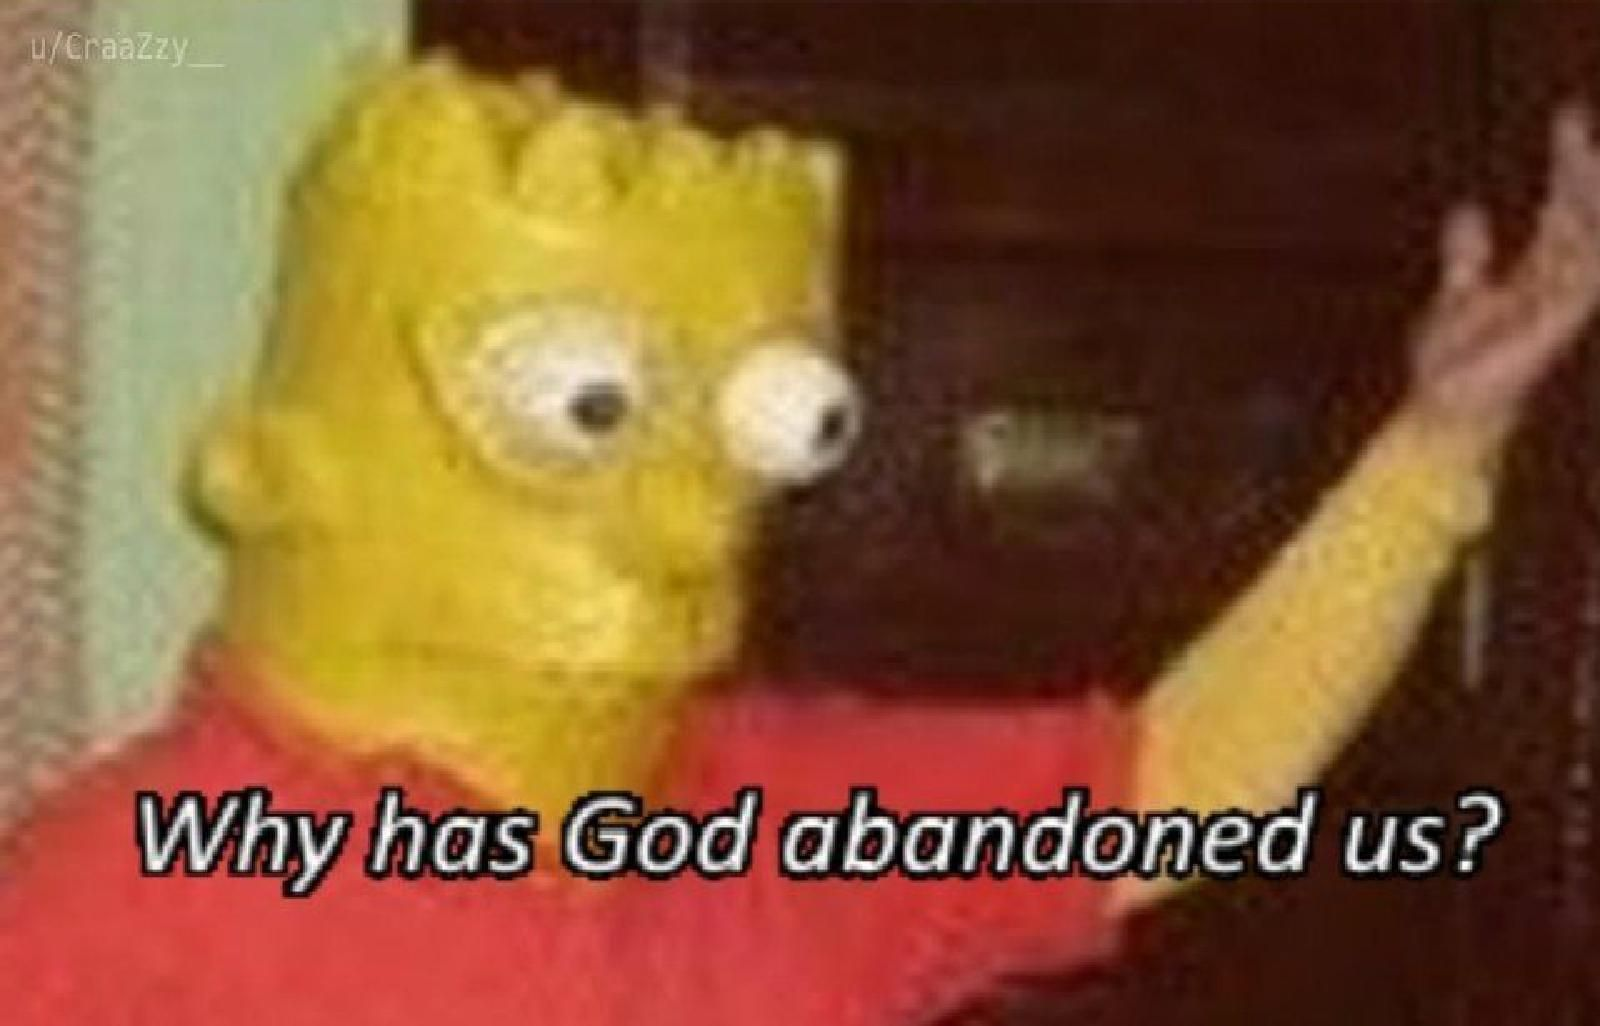

In [40]:
Image(filename='GodMeme.jpg') 